<a href="https://colab.research.google.com/github/marjan-2023/data/blob/master/data_mining_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve

In [3]:
data = pd.read_csv('breast-cancer (2).data')
data.columns= ['Class', 'age', 'menopause','tumor-size','inv-nodes','node-caps','deg-malig',' breast','breast-quad',' irradiat']
data.to_csv('breast-cancer2.data', index=False)
data





,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [4]:
df=data
df.shape

(285, 10)

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Class,285,2,no-recurrence-events,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,285,6,50-59,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
menopause,285,3,premeno,149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tumor-size,285,11,30-34,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inv-nodes,285,7,0-2,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node-caps,285,3,no,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deg-malig,285.0,NaN,NaN,NaN,2.045614,0.737351,1.0,2.0,2.0,3.0,3.0
breast,285,2,left,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
breast-quad,285,6,left_low,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
irradiat,285,2,no,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()
#No missing data but we have some with ? mark

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
 breast        0
breast-quad    0
 irradiat      0
dtype: int64

In [6]:
print(df["Class"].unique())
print(type(df["Class"].unique()))


print(df["age"].unique())
print(type(df["age"].unique()))

print(df["menopause"].unique())
print(type(df["menopause"].unique()))

print(df["tumor-size"].unique())
print(type(df["tumor-size"].unique()))

print(df["inv-nodes"].unique())
print(type(df["inv-nodes"].unique()))

print(df["node-caps"].unique())
print(type(df["node-caps"].unique()))

print(df["deg-malig"].unique())
print(type(df["deg-malig"].unique()))

#print(df["breast"].unique())
#print(type(df["breast"].unique()))

print(df["breast-quad"].unique())
print(type(df["breast-quad"].unique()))

#print(df["irradiat"].unique())
#print(type(df["irradiat"].unique()))




['no-recurrence-events' 'recurrence-events']
<class 'numpy.ndarray'>
['40-49' '60-69' '50-59' '30-39' '70-79' '20-29']
<class 'numpy.ndarray'>
['premeno' 'ge40' 'lt40']
<class 'numpy.ndarray'>
['20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '30-34' '40-44' '35-39'
 '5-9' '45-49']
<class 'numpy.ndarray'>
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
<class 'numpy.ndarray'>
['no' 'yes' '?']
<class 'numpy.ndarray'>
[2 1 3]
<class 'numpy.ndarray'>
['right_up' 'left_low' 'left_up' 'right_low' 'central' '?']
<class 'numpy.ndarray'>


In [7]:
uniqueValues = df.nunique()
print(uniqueValues)

Class           2
age             6
menopause       3
tumor-size     11
inv-nodes       7
node-caps       3
deg-malig       3
 breast         2
breast-quad     6
 irradiat       2
dtype: int64


In [8]:
data.info

<bound method DataFrame.info of                     Class    age menopause tumor-size inv-nodes node-caps  \
0    no-recurrence-events  40-49   premeno      20-24       0-2        no   
1    no-recurrence-events  40-49   premeno      20-24       0-2        no   
2    no-recurrence-events  60-69      ge40      15-19       0-2        no   
3    no-recurrence-events  40-49   premeno        0-4       0-2        no   
4    no-recurrence-events  60-69      ge40      15-19       0-2        no   
..                    ...    ...       ...        ...       ...       ...   
280     recurrence-events  30-39   premeno      30-34       0-2        no   
281     recurrence-events  30-39   premeno      20-24       0-2        no   
282     recurrence-events  60-69      ge40      20-24       0-2        no   
283     recurrence-events  40-49      ge40      30-34       3-5        no   
284     recurrence-events  50-59      ge40      30-34       3-5        no   

     deg-malig  breast breast-quad  irradia

In [9]:
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
df.shape

(276, 10)

In [11]:
target_df = df['Class']
features_df = df.drop(columns='Class')
features_df = pd.get_dummies(features_df)

target_df.head()
features_df.head()

,deg-malig,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,menopause_premeno,...,node-caps_yes,breast_left,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes
0,2,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
1,2,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,2,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3,2,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
4,2,0,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


**1**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df,test_size=0.2, random_state=42)

In [13]:
print(X_train)

     deg-malig  age_20-29  age_30-39  age_40-49  age_50-59  age_60-69  \
258          3          0          1          0          0          0   
232          2          0          0          0          0          1   
33           1          0          0          0          1          0   
157          1          0          0          1          0          0   
148          3          0          0          0          1          0   
..         ...        ...        ...        ...        ...        ...   
188          2          0          0          0          1          0   
71           2          0          0          0          0          1   
106          2          0          1          0          0          0   
270          3          0          0          0          1          0   
102          2          0          0          1          0          0   

     age_70-79  menopause_ge40  menopause_lt40  menopause_premeno  ...  \
258          0               0               0   

**2**

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef


clf = GaussianNB()
clf.fit(X_train, y_train)

# prediction on testing data
predictions_clf = clf.predict(X_test)
#  accuracy of the classifier
accuracy_clf = accuracy_score (y_test, predictions_clf)
print ("Accuracy:", accuracy_clf)

# cofusion matrix 
cm = confusion_matrix(y_test, predictions_clf)
print("Confusion Matrix")
print(cm)
# Matthew's correlation Coefficient 
mcc = matthews_corrcoef(y_test, predictions_clf)
print("Matthew Correlation Cofficient:", mcc)

Accuracy: 0.4642857142857143
Confusion Matrix
[[11 29]
 [ 1 15]]
Matthew Correlation Cofficient: 0.23395480008935163


In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model = rfc.fit(X_train, y_train)
prediction_rfc = model.predict(X_test)

accuracy_rfc= accuracy_score(y_test, prediction_rfc)
print ("Accuracy:", accuracy_rfc)


Accuracy: 0.7142857142857143


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef

rfc=RandomForestClassifier()
model = rfc.fit(X_train, y_train)
prediction_rfc = model.predict(X_test)

accuracy_rfc= accuracy_score(y_test, prediction_rfc)
print ("Accuracy:", accuracy_rfc)
# cofusion matrix 
cm = confusion_matrix(y_test,prediction_rfc)
print("Confusion Matrix")
print(cm)
# Matthew's correlation Coefficient 
mcc = matthews_corrcoef(y_test, prediction_rfc)
print("Matthew Correlation Cofficient:", mcc)

Accuracy: 0.6964285714285714
Confusion Matrix
[[34  6]
 [11  5]]
Matthew Correlation Cofficient: 0.1847739541748624


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef
# Train the SVM classifie
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Predict the labels for test data
predicted_labels = clf.predict(X_test)

accuracy_clf = accuracy_score (y_test, predicted_labels)
print ("Accuracy:", accuracy_clf)
# cofusion matrix 
cm = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix")
print(cm)
# Matthew's correlation Coefficient 
mcc = matthews_corrcoef(y_test, predicted_labels)
print("Matthew Correlation Cofficient:", mcc)



Accuracy: 0.7678571428571429
Confusion Matrix
[[35  5]
 [ 8  8]]
Matthew Correlation Cofficient: 0.40125028212920383


In [23]:
# Logistic Regression

In [24]:
from pandas.core.common import random_state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LR = LogisticRegression()
LR.fit(X_train,y_train)
predicted_labels = LR.predict(X_test)
accuracy_LR = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy_LR)

#Matthew 
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef
# cofusion matrix 
cm = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix")
print(cm)
# Matthew's correlation Coefficient 
mcc = matthews_corrcoef(y_test, predicted_labels)
print("Matthew Correlation Cofficient:", mcc)


Accuracy: 0.7678571428571429
Confusion Matrix
[[35  5]
 [ 8  8]]
Matthew Correlation Cofficient: 0.40125028212920383


In [25]:
#Knn

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predicted_labels = knn.predict(X_test)
acc = accuracy_score (y_test, predicted_labels)
print("accuracy:", acc)
#Matthew 
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef
# cofusion matrix 
cm = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix")
print(cm)
# Matthew's correlation Coefficient 
mcc = matthews_corrcoef(y_test, predicted_labels)
print("Matthew Correlation Cofficient:", mcc)

accuracy: 0.7678571428571429
Confusion Matrix
[[36  4]
 [ 9  7]]
Matthew Correlation Cofficient: 0.3837612894400988


#Precision-Recall graphs

In [28]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [29]:
X, y = datasets.make_classification(n_samples=1000,
                                    n_features=4,
                                    n_informative=3,
                                    n_redundant=1,
                                    random_state=0)
classifier = LogisticRegression()
classifier.fit(X, y)


LogisticRegression()

In [30]:
y_score = classifier.predict_proba(X)[:, 1]


In [31]:
precision, recall, thresholds = precision_recall_curve(y, y_score)


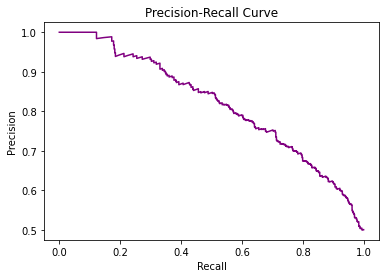

In [32]:
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [33]:
# ROC

In [34]:
from sklearn.datasets import make_classification
import numpy as np 

In [35]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)


In [36]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
     

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [39]:
rf = RandomForestClassifier(max_features=5, n_estimators=50)
rf.fit(X_test,y_test)
     

RandomForestClassifier(max_features=5, n_estimators=50)